In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
from utiles import *

Teoría de Decisión y Desempeño, aplicado a estimadores lineales. 
=

# Introducción

En los problemas de detección y estimación se tienen dos grandes conjuntos de problemas, por un lado, **problemas de regresión**, donde se tiene datos en una dupla $(X,Y)$ de la que se supone que existe una relación $y = f(x)$ y, desde ya, no se conoce la función $f$. 

Por ejemplo, se puede realizar un experimento imaginario donde se toman datos en dos dimensiones, $X$ e $Y$:

In [2]:
# Se extraen datos de algún experimento
y,x = sec_experimental()

fig = plt.figure(figsize=(9,6))
plt.plot(x,y,'.')
print(f'Los primeros 6 datos experimentales: \n x:{x[:6]} \n y:{y[:6]}')

Los primeros 6 datos experimentales: 
 x:[10.5917904   7.29990939  3.65823589  7.82451462  0.03151529  2.5539981 ] 
 y:[ 3.07154334  9.75157397 -5.84860038 -2.19568808  0.96959972 -4.28543263]


Sin embargo, aquí podemos ir a la línea de código, 
<div>
     
    def sec_experimental(N=1000): 
        x = 4 * np.pi * np.random.rand(N)
        y = np.sin(x) + np.random.randn(N)*4
        return y,x

</div>

y ver que los datos experimentales son una señal sinusoidal afectada por ruido gausseano. 

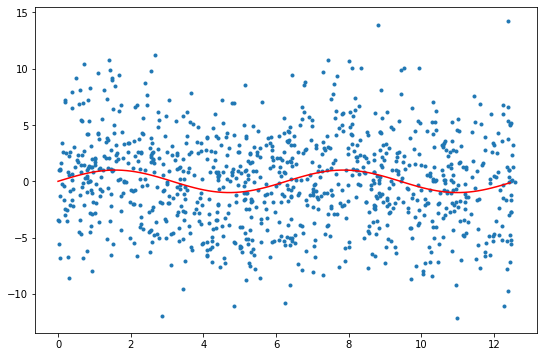

In [7]:
fig = plt.figure(figsize=(9,6))
plt.plot(x,y,'.')
x1 = np.arange(100)/100*np.pi*4
plt.plot(x1,np.sin(x1),'red')
print("")

Entonces, en este caso, el problema de regresión busca determinar un *estimador* $\hat{f}$ de $f$ tal que

$$\hat{f}(x) \approx sin(x) \; \forall x \in [0,4\pi]$$

El otro grupo de problemas son los **problemas de clasificación**, donde se busca determina a qué categoría pertenece una muestra. En este caso, el *estimador* que se genera busca determinar a qué clase de equivalencia pertenece una muestra. 


En cierto experimento se obtiene un conjunto de datos:


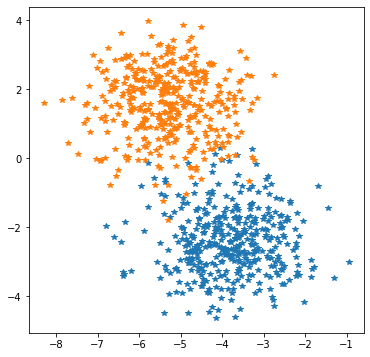

In [6]:
# Parametros e inicialización de las simulaciones para este documento.

quant_tag = 2
quant_data = 1000
dimension = 2
test_proportion = 0.2
gap=3
learning_rate = 0.001

# Generación de datos.
training, training_tags, test, tags = corpus_generator(quant_tag, quant_data, dimension, test_proportion, gap)

# Visualizamos
plt_data_2d(training, training_tags)
print("")

Y para este caso se espera que estimador $\hat{f}$ determine a qué categoría pertenece una muestra aleatoria. En el caso del ejemplo, se busca, un estimador que determine, para toda muestra $x \in \mathbb{R}^2$, si

Si $ \hat{f}(x) == 1$, entonces la muestra $x$ pertenece a la categoría <span style="color:#FD8029">naranja</span>, en caso contrario, si $\hat{f}(x) == 0$ pertenece a la categoría <span style="color:#2678B2">azul</span>.

En lo que sigue se va a determinar el estimador lineal que **clasifique** las muestras como <span style="color:#FD8029">naranjas</span> o <span style="color:#2678B2">azules</span>.


# Optimización. 

## Modelos Lineales.


 A partir de un experimento se determinan dos conjuntos, $\mathcal{X}:\{X_1, X_2, \dots, X_n \}$ el conjunto de $n$ muestras aleatorias, y un conjunto de análisis que determina la clase o etiqueta de las muestras $\mathcal{Y}: \{y_1, y_2, \dots y_n \}$ Cada muestra se puede organizar en una matriz $X \in \mathbb{R}^{p \times n}$, siendo $X = [X_1, X_2, \dots, X_n]$ con $X_j \in \mathbb{R}^p$ y $n$ es la cantidad de muestras del experimento. Cada $X_j$ pertenece a una categoría $y_j$, ordenada en un vector $Y^T = [y_1, y_2, \dots y_n]$. El modelo lineal busca predecir las categoría $y_j$ a la que pertenece la muestra  $X_j$:

$$ \hat{y_j} = \beta_0 + \sum_{i=1}^p \beta_i \; x_j^i$$

con $i=0,\dots, p$, donde $x_j^i$ es la i-esima coordenada de la muestra $X_j$, $\beta_i \in \mathbb{R}$  son los parámetros del estimador, y $p$ es la dimensión de $X_j$.

Se puede definir el vector $\beta^T = [\beta_0, \beta_1, \dots, \beta_p]$, y redefinir $X\in \mathbb{R}^{(p+1)\times n}$

$$X = \left [ {\begin{array}\\
1 & 1 & \cdots &  1\\
- & - & \cdots &  -\\
X_1 & X_2 & \cdots & X_n
\end{array}} \right ]$$

de esta forma puede escribir al estimador de forma vectorial , 

$$\hat{Y} = X^T \beta$$

Encontrar un estimador consiste, entonces, en determinar el vector $\beta$ tal que el error que cometa el estimador sea el mínimo posible. Podemos adoptar el Error Cuadrático:

$$EC(\beta) = \left \| Y - \hat{Y}(\beta) \right \|^2 = (Y - X^T\beta)^T(Y-X^T\beta)$$

Para encontrar el mínimo EC, se determina el gradiente respecto a $\beta$:

$$ \nabla_\beta(EC) =  2\;X \left ( Y - X^T \; \beta \right )$$

El óptimo se obtiene cuando $ \nabla_\beta(EC) = 0 $, y se tiene la solución conocida como **mínimos cuadrados**:

$$\beta = \left (X\;X^T \right )^{-1}X\;Y$$

# Método del Gradiente.

La solución por mínimos cuadrados requiere un estimador lineal, donde considera al Error Cuadrático como **función de  costo**. Siendo las redes neuronales de naturaleza no lineal, no es posible aplicar mínimos cuadrados. En este caso se usan algoritmos de optimización, siendo uno muy empleado es el Método del Gradiente, donde se buscan los pesos $\beta$ óptimos de a pasos en la dirección descendente del gradiente.

![Descenso por gradiente negativo](./img/gd.png)

 
Se puede pensar que la función de costo ($Loss(X,Y;\beta)$) posee una forma como la de la figura posterior, y se busca minimizar el costo bajando por la pendiente. Este método es **sub-óptimo**, puesto que existe la posibilidad de caer en un mínimo local (<span style="color:red">pelota roja</span> en la figura). 

Entonces, considerando lo anterior, donde se definió el estimador 

$$ \hat{y_j} = \beta_0 + \sum_{i=1}^p \beta_i \; x_j^i$$

con $i \in 1 \dots n$, el costo de estimar mal:

$$\mathcal{L}(Y,X;\beta) = \left \| Y - \hat{Y}(X;\beta) \right \|^2 $$

se obtiene el gradiente:

$$\nabla_\beta \mathcal{L}(Y, X;\beta) =  - 2\;X \left ( Y - X^T \; \beta \right )$$

Luego, se ajusta $\beta$ mediante aproximaciones sucesivas:

$$ \beta_k = \beta_{k-1} - \eta \; \nabla_\beta \mathcal{L}(Y, X;\beta_{k-1})$$

donde $\eta \ll 1$ es llamada velocidad de aprendizaje y $k \in \mathbb{N}$ es el paso de aprendizaje.

## El gradiente más de cerca.

La última ecuación es el método del gradiente descendente, pero es interesante ver más de cerca qué opera. Por un lado $\hat{Y} = X^T\;\beta$ es el estimador de $Y$. Entonces $\epsilon = (Y - X^T \; \beta)$ es el error de estimación, $\epsilon \in \mathbb{R}^n$, que es un vector de dimensión $n$, es decir cada elemento j-ésimo de $\epsilon$ ($\epsilon_j$) es el error cuando se estima la clase $y_j$ de la muestra $X_j$:

$$\nabla_\beta \mathcal{L}(Y, X;\beta) =  -2\;X \left ( Y - X^T \; \beta \right ) = -2\;X \left [ {\begin{array}\\
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n 
\end{array}} \right ] = \left [ \begin{array}\\
-2 \sum_{j=1}^n \epsilon_j \\
-2 \sum_{j=1}^n x_j^1 \; \epsilon_j \\
{-2 \sum_{j=1}^n x_j^2 \; \epsilon_j} \\
\hfil \vdots \hfil \\
-2 \sum_{j=1}^n x_j^p \; \epsilon_j
\end{array} \right ] \in \mathbb{R}^p$$

es decir, se realizan $p$ sumatorias de $n$ términos, donde $n$ es la cantidad de muestras. Por lo tanto, el método no es eficiente, más considerando que un *corpus* de entrenamiento, puede tener 10000 muestras. Es decir, por cada paso, se deben realizar $10000 \times p$ operaciones.



## Gradiente Descendente Estocástico (SGD)).

El SGD es un método de optimización que propone, para cada paso, tomar una muestra del conjunto de entrenamiento, en forma aleatoria, calcular el gradiente, y actualizar los parámetros del estimador ($\beta$). 

Es decir, se selecciona aleatoriamente una muestra $X_j \in \mathcal{X}$, con $\mathcal{X}:\{X_1, X_2, \dots, X_n \}$ el conjunto de muestras, y a partir de ella se actualizan los parámetros del modelo:

$$ \beta_k = \beta_{k-1} - \eta \; \nabla_\beta \mathcal{L}(y_j, X_j;\beta_{k-1}) = \beta_{k-1} + \eta \; 2 \left ( y_j - X_j^T \; \beta \right ) \; X_j$$

### Algoritmo

1. Iniciar parámetros $\beta$ y definir velocidad de aprendizaje $\eta$.
2. **Repetir**,
    1. Generar una mezcla aleatoria del conjunto de entrenamiento $\mathcal{X}_1 = shuffle[\mathcal{X}]$
    2. **Para cada** j-elemento de $\mathcal{X}_1$
        1. $\beta_k = \beta_{k-1} - \eta \; \nabla_\beta \mathcal{L}(y_j, X_j;\beta_{k-1})$
3. **Hasta** $\mathcal{L}(y_{test}, X_{test};\beta_{k}) \approx \underset{\forall \beta}{min} \mathcal{L}(\beta)$

<div class="alert alert-block alert-warning">
En general $\underset{\forall \beta}{min} \mathcal{L}(\beta)$ no se conoce, y se detiene el entrenamiento cuando el costo no se sigue reduciendo. Esto puede significar que se llegó a un mínimo local, y no absoluto. Para evitar esto, se entrenan varios modelos, y luego se adopta el mejor. <b>¿ Cuál es el criterio de entrenamiento?</b> 
</div>

#### Otros algoritmos de optimización basados en SGD:

* SGD implícito
* SGD con Momento
* Media del SDG
* AdaGrad
* RMSProp
* Adam
* Otros

Hay que considerar también que aquí se trabajó sobre una función de costo cuadrática, sin embargo se pueden definir otras funciones de costos. Una función de costo muy relevante es la Entropía Cruzada, que aquí no la vamos a considerar.


### Aproximación a la Generación de un Estimador.

In [8]:
def EC(y,x,beta):
    """
    Error Cuadrático
    """
    return (y-np.matmul(x.transpose(),beta)).item()**2

def EC_SGD(y,x,beta):
    """
    Gradiente descendente estocástico para el error cuadrático.
    """
    return (y-np.matmul(x.transpose(),beta)).item()*x


In [9]:
# Se redefinen y ajustan muestras y labels para el problema

X = np.ones((training.shape[0],training.shape[1]+1)) # Se 
X[:,1:] = training
X = np.asmatrix(X).transpose()  #X: filas: features, columnas: muestras
Y = (2*training_tags - 1) # Pasamos de {0,1} a {-1, 1}

In [10]:
# ---------------------------------------------------------------------
# Entrenamiento. Empleando una única vez al conjunto de entrenamiento.
#----------------------------------------------------------------------

beta = np.random.randn(X.shape[0],1)  # parametros del estimador
eta = 0.01  # velocidad de aprendizaje

error = [] # guardamos el error por época 
epoch=20   # una epoca implica 20 pasos de entrnamiento.
aux=0
for i in range(len(Y)):
    aux+=1
    beta = beta + eta*EC_SGD(Y[i],X[:,i],beta)  # ACTUALIZACIÓN DE PARÁMETROS DEL MODELO
    if aux == 20:
        error.append(EC(Y[0],X[:,0],beta)) # Registro de error
        aux = 0
        

Si se grafica la función de costo $\mathcal{L}(epocas)$,

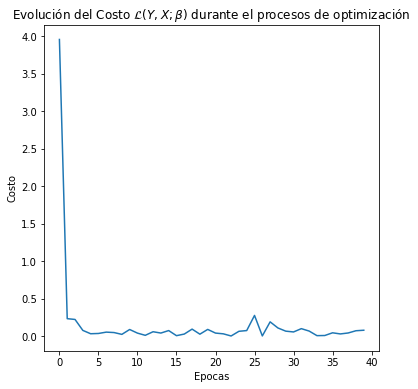

In [11]:
plt.figure(figsize=(6,6))
plt.plot(error)
plt.xlabel("Epocas")
plt.ylabel("Costo")
plt.title('Evolución del Costo ' + r'$\mathcal{L}(Y,X;\beta)$' + ' durante el procesos de optimización ')
print("")

<div class="alert alert-block alert-warning">
En general se puede observar que la función decrece, y queda establecida dentro de cierto entorno, <b> pero también es posible que salga de ese entorno</b>. Otra cuestión no menor, que el error lo estamos evaluando con muestras con las que se está optimizando. El estimador lineal que se emplea posee 3 parámetros, pero muchos estimadores, especialmente las redes neuronales, poseen cientos de miles de parámetros, y por lo tanto tienden a "memorizar", o sobre expresar las características del conjunto de entrenamiento. <b> Si se evalúan nuevas muestras, el estimador puede fallar, y entonces se dice que hay "overfitting": El estimador no da una solución generalista.</b>
    Entonces, <b> ¿Cómo obtener un modelo que generaliza? </b>
</div>

#### Testeo con muestras independientes del entrenamiento.
Oportunamente se separó un conjunto de muestras *test* y sus etiquetas *tags* para evaluar al estimador.


In [12]:
# Testeo:

# Se redefinen y ajustan muestras y labels para el problema
X_test = np.ones((test.shape[0],test.shape[1]+1)) # Se 
X_test[:,1:] = test
X_test = np.asmatrix(X_test).transpose()  #X: filas: features, columnas: muestras
Y_test = (2*tags - 1) # Pasamos de {0,1} a {-1, 1}

In [13]:
index = np.random.randint(0,X_test.shape[1],10)
for i in index:
    y_est = (np.matmul(X_test[:,i].transpose(),beta)).item()
    print( f"Valor estimado: {y_est} \t Valor real: {Y_test[i]}")

Valor estimado: 1.2330826081808661 	 Valor real: 1
Valor estimado: -0.39843833511647825 	 Valor real: -1
Valor estimado: -0.7702716714933733 	 Valor real: -1
Valor estimado: 0.09738187924665201 	 Valor real: 1
Valor estimado: 1.0983910743857022 	 Valor real: 1
Valor estimado: -0.44997085403260073 	 Valor real: -1
Valor estimado: 0.2831261552653011 	 Valor real: 1
Valor estimado: -0.8004540286241963 	 Valor real: -1
Valor estimado: -1.1385378371979682 	 Valor real: -1
Valor estimado: 0.1455578094150068 	 Valor real: 1


Al ser lineal, y definida las etiquetas $1$ y $-1$,  $X^T \; \beta = 0$ podemos encontrar un plano de separación "intuitivo". Veamos entonces el resultado

Grafica de estimaciones


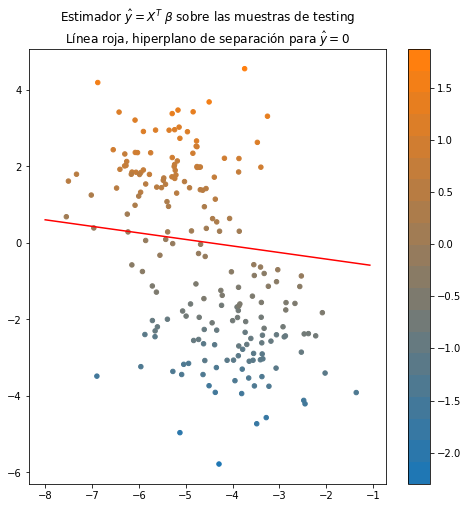

Gráfica de muestras de entrenamiento


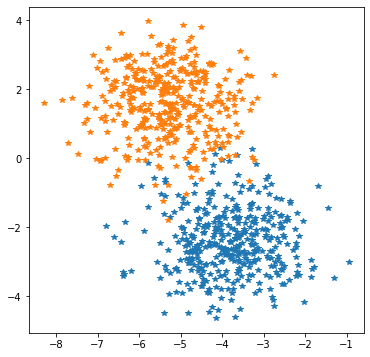

In [14]:

keys = list(TABLEAU_COLORS.keys())
colors = [TABLEAU_COLORS[keys[0]], TABLEAU_COLORS[keys[1]]]
cm = LinearSegmentedColormap.from_list("Custom", colors, N=20)
ax = plt.figure(figsize=(8,8)).subplots(1,1)

x_min = np.floor(test[:,0].min())
x_max = np.ceil(test[:,0].max())
rango = np.asarray(range(100))/100 *(x_max-x_min) + x_min
plano = (beta[0].item()+beta[1].item()*rango)/(-beta[2].item())

# ESTIMACIÓN SOBRE EL CONJUNTO TEST
y_est = np.asarray(np.matmul(X_test.transpose(), beta))

sc = ax.scatter(test[:,0],test[:,1], s=20, c=y_est, cmap=cm)
plt.colorbar(sc)
ax.plot(rango,plano, 'red')
ax.set_title(r'Estimador $\hat{y} = X^T \; \beta$ sobre las muestras de testing'
             '\n'
             r'Línea roja, hiperplano de separación para $\hat{y}=0$')
print("Grafica de estimaciones")
plt.show()

print("Gráfica de muestras de entrenamiento")
plt_data_2d(training, training_tags)
print("")

<div class="alert alert-block alert-danger">
Todo análisis y evaluación de un estimador se realiza con un conjunto INDEPENDIENTE del conjunto de entrenamiento. NUNCA con el conjunto de entrenamiento. <br> El conjunto de evaluación se suele llamar <b> Conjunto de Test </b>    
</div>

## Etapa de Decisión - Métricas de Desempeño.

Se llegó a este punto, pero en realidad, no se tiene definido el estimador. Como tal, la función $\hat{y}(X) \in \mathbb{R}$ y a partir del resultado obtenido en la evaluación de una muestra se debe *decidir* a qué categoría pertenece tal evaluada. Por lo tanto, se debe definir una **etapa de decisión** la cuál posee un parámetro $\delta \in \mathbb{R}$, a partir del cual se define la categoría:

$$\hat{y}(X;\beta,\delta) = \left \{ {\begin{array}\\
1 & X^T\beta \geq \delta \\
-1 &  X^T\beta < \delta
\end{array}} \right. $$

Es decir, el estimador posee los parámetros $\beta$ que se define por aprendizaje (optimización) y un **hiperparámetro $\delta$ que se debe ajustar bajo algún criterio**.

Se proponen dos casos, el intuitivo $\delta = 0$, donde está claro, observando algún ejemplo apropiado, que se cometerán errores, también se propone uno alternativo $\delta = -0.9$, y se observará el estimador resultante.


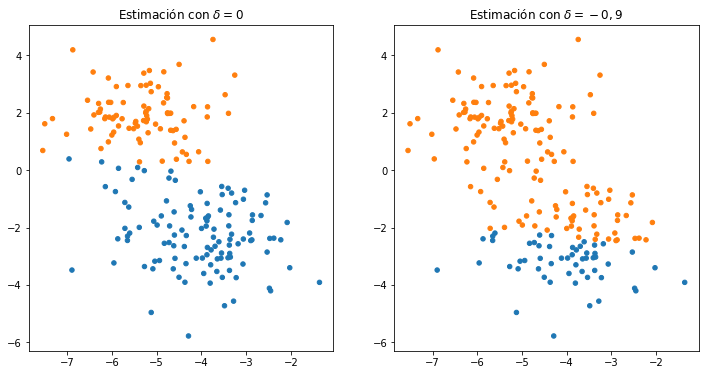

In [15]:
delta_0 = 0
delta_1 = -0.9

y_est_0 = np.ones(y_est.size)
y_est_0[(y_est<delta_0)[:,0]] = -1 
y_est_1 = np.ones(y_est.size)
y_est_1[(y_est<delta_1)[:,0]] = -1 

ax = plt.figure(figsize=(12,6)).subplots(1,2)
ax[0].scatter(test[:,0],test[:,1], s=20, c=y_est_0, cmap=cm)
ax[0].set_title("Estimación con " + r'$\delta = 0$')
ax[1].scatter(test[:,0],test[:,1], s=20, c=y_est_1, cmap=cm)
ax[1].set_title("Estimación con " + r'$\delta = -0,9$')
print("")

Cuál es el mejor umbral de decisión $\delta$ dependerá del problema que se aborda. Por ejemplo, si se busca estimar personas afectadas por una enfermedad no importará tanto errar y detectar sanos como enfermos, pero sí importará perder enfermos por detectarlos como sanos. 

Entonces, es claro que el **error** es un parámetro importante para conocer al estimador desarrollado.

### Métricas de Desempeño. Errores de predicción. 

Definido un estimador, y empleando el conjunto de testeo, $\mathcal{X}_{test}$, puede interesar conocer cuál es la probabilidad de error. Para tener un acercamiento a la Teoría de Estimación de Bayes, podemos suponer que $\mathcal{H}_0: y=-1$, la *hipótesis nula* corresponde al caso $y=-1$, y $\mathcal{H}_1: y=1$, la *hipótesis alternativa* corresponde al caso $y=1$ El error, en este caso, va a tener dos componentes:

* cuando el estimador elige a la categoría $1$, cuando en realidad la muestra era de la categoría $-1$. 
* cuando el estimador elige $-1$, cuando en realidad la categoría era $1$.

Por lo tanto, la probabilidad de error $P(\epsilon)$ es:

$$ P(\epsilon) =  P(\mathcal{H}_0) \; P\left({\mathcal{H}_1}\mid {\mathcal{H}_0} \right) + P(\mathcal{H}_1) \; P\left({\mathcal{H}_0} \mid {\mathcal{H}_1} \right)$$

$$ P(\epsilon) =  P(y=-1) \; P\left( {y=1} \mid {y=-1} \right) + P(y=1) \; P\left( {y=-1} \mid {y=1} \right)$$


donde $P(y=-1) \; P\left(y=1/y=-1 \right)$ es la probabilidad que *mide* al **conjunto de falsos positivos (FP)**, también conocido como error de tipo I y $P(y=1) \; P\left(y=-1/y=1 \right)$ es la probabilidad que *mide* al **conjunto de falsos negativos (FN)**, también conocido como error de tipo II. $P(y=1)$ y $P(y=-1)$ son la probabilidad de que las muestras evaluadas pertenezcan a la categoría 1 y (-1) respectivamente.

Por otra parte, se puede determinar la probabilidad de acierto $P(A)$:

$$ P(\epsilon) =  P(\mathcal{H}_0) \; P\left(\mathcal{H}_0 \mid \mathcal{H}_0 \right) + P(\mathcal{H}_1) \; P\left(\mathcal{H}_1 \mid \mathcal{H}_1 \right)$$

$$ P(A) =  P(y=-1) \; P\left(y=-1 \mid y=-1 \right) + P(y=1) \; P\left(y=1 \mid y=1 \right)$$

siendo $ P(y=-1) \; P\left(y=-1/y=-1 \right)$ la probabilidad que *mide* al **conjunto de verdaderos negativos (TN)** y $ P(y=1) \; P\left(y=1/y=1 \right)$ la probabilidad que *mide* al **conjunto de verdaderos positivos (TP)**.

Como se observa. las probabilidades condicionales describen el comportamiento del estimador

<img src="img/condicionales.png" alt="Probabilidades condicionales en teoría de decisión" width="300">


La figura superior muestra la distribución de probabilidades condicionales, y los conjuntos resultantes. El cuadro verde indica los elementos que fueron clasificados como $\hat{y}=1$ (ó $\mathcal{H}_1$) por el estimador. Los conjuntos son todos disjuntos. A partir de este concepto se pueden construir los siguientes estadísticos:

#### Matriz de Confusión:


<img src="img/confusion.png" alt="Matriz de Confusión" width="400">

La matriz de confusión se realiza contando los aciertos y errores conociendo la categoría real a la que pertenece la muestra Se estiman entonces las siguientes probabilidades:

* $P(TP) = \frac{\#\;\mathcal{H}_1 \; estimados \; como \; \mathcal{H}_1 } {\# \; Total \; de\;muestras} = P(\mathcal{H}_1) \; P(\mathcal{H}_1\mid \mathcal{H}_1)$
* $P(TN) = \frac{\#\;\mathcal{H}_0 \; estimados \; como \; \mathcal{H}_0 } {\# \; Total \; de\;muestras} = P(\mathcal{H}_0) \; P(\mathcal{H}_0 \mid \mathcal{H}_0)$
* $P(FP) = \frac{\#\;\mathcal{H}_0 \; estimados \; como \; \mathcal{H}_1 } {\# \; Total \; de\;muestras} = P(\mathcal{H}_0) \; P(\mathcal{H}_1 \mid \mathcal{H}_0)$
* $P(FN) = \frac{\#\;\mathcal{H}_1 \; estimados \; como \; \mathcal{H}_0 } {\# \; Total \; de\;muestras} = P(\mathcal{H}_1) \; P(\mathcal{H}_0 \mid \mathcal{H}_1)$

a partir de la determinación de esta matriz se determinan cuatro estadísticos sumamente relevantes para describir cualquier estimador.

#### Exactitud.
Mide la cantidad de aciertos del estimador.

$$Exactitud = P(TP)+P(TN)$$

#### Precisión.
Es la probabilidad de que una muestra seleccionada como $\mathcal{H}_1$, sea efectivamente $\mathcal{H}_1$:

$$precisi\acute{o}n = \frac{P(TP)}{P(TP)+P(FP)}$$

#### Sensibilidad o True Positive Rate (TPR).
Mide la fracción de eventos $\mathcal{H}_1$ son efectivamente detectados.

$$TPR = \frac{P(TP)}{P(TP)+P(FN)}$$

#### False Positive Rate (FPR) o Falsa Alarma. 
Mide la fracción de eventos $\mathcal{H}_0$ que son mal detectados.

$$FPR = \frac{P(FP)}{P(FP)+P(TN)}$$

#### F-Mesure.
Es el promedio geométrico entre *Precisión* y *Sensibilidad*. Suele ser criticada por ser una medida sesgada.

$$F_\beta = \left (1+\beta^2 \right) \frac{precisi\acute{o}n \times sensibilidad}{\beta^2 \; precisi\acute{o}n \; sensibilidad}$$

donde se suele emplear $\beta=2$ para pesar la precisión, y $\beta = 0.5$ para dar más peso a la sensibilidad (Nota: este $\beta$ no es el vector de parámetros).




#### Ejemplo, basado en $\delta = 0$ y $\delta = -0.9$

Se genera una función que analiza el estimador. **Todo estimador que se diseñe debe estar acompañado del análisis estadístico**.

In [19]:
def estadistico(beta, delta, X_test, Y_test):   
    """
    Estima sobre un conjunto de testeo al estimador lineal dado por los parámetros beta
    y evalúa la calidad del estimador.
    In:
    :beta: vector de parámetros
    :delta: lista de umbrales a considerar
    :X_test: conjunto de testeo
    :Y_test: categorías del los elementos en X_test
    
    
    Return out, estimador
    out: Dataframe de estadísticos 'delta','TP','FP','FN','TN','exactitud','precision', 'tpr', 'fpr'
    estimador: lista con estimaciones.
    """
    Total = len(Y_test)
    # estimador
    y_est_aux = np.asarray(np.matmul(X_test.transpose(), beta))

    # clasificador
    aux = []
    estimador = []
    for d in delta:
        y_est = np.ones(y_est_aux.size)
        y_est[(y_est_aux < d)[:,0]] = -1 

        # Estadísticos

        # Mtx Confusión
        TP = sum((y_est==1) & (Y_test==1)) / Total
        FP = sum((y_est==1) & (Y_test==-1)) / Total
        FN = sum((y_est==-1) & (Y_test==1)) / Total
        TN = sum((y_est==-1) & (Y_test==-1)) / Total

        # Exactitud
        exac = TP + TN

        # Precisión
        prec = TP / (TP + FP)

        #Sensibilidad o True Positive Rate (TPR)
        tpr = TP / (TP + FN)

        #False Positive Rate (FPR) o Sensibilidad a equivocarse

        fpr = FP / (FP + TN)
        aux.append({'delta':d, 'TP':TP, 'FP':FP, 'FN':FN, 'TN':TN,
                   'exactitud':exac, 'precision':prec, 'tpr':tpr, 'fpr':fpr})

        estimador.append(y_est)
        
    out = pd.DataFrame(aux)
    return out, estimador
    

Evaluamos y visualizamos:

,delta,TP,FP,FN,TN,exactitud,precision,tpr,fpr
0,0.0,0.530,0.00,0.005,0.465,0.995,1.000000,0.990654,0.000000
1,-0.9,0.535,0.33,0.000,0.135,0.670,0.618497,1.000000,0.709677


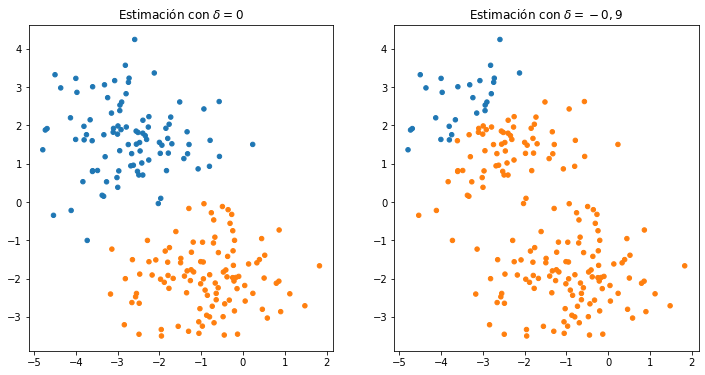

In [20]:
delta = [0, -0.9]
out, estim = estadistico(beta, delta, X_test, Y_test)

ax = plt.figure(figsize=(12,6)).subplots(1,2)
ax[0].scatter(test[:,0],test[:,1], s=20, c=y_est_0, cmap=cm)
ax[0].set_title("Estimación con " + r'$\delta = 0$')
ax[1].scatter(test[:,0],test[:,1], s=20, c=y_est_1, cmap=cm)
ax[1].set_title("Estimación con " + r'$\delta = -0,9$')
out

#### Curva ROC (Receiver Operating Charachteristic)

Para analizar la **calidad del estimador** se emplea Curva ROC. Que es una curva que se obtiene a partir de variar el umbral $\delta$ del clasificador determinando los estadísticos para cada caso. En particular importan dos estadísticos, **True Positive Rate (TPR)** o Sensibilidad, y **False Positive Rate (FPR)** o Falsa Alarma.

$$\begin{array}\\
TPR = \frac{P(TP)}{P(TP)+P(FN)}  \\
FPR = \frac{P(FP)}{P(FP)+P(TN)}
\end{array}$$

En la siguiente imagen se puede interpretar como se conforma la curva ROC:

<img src="img/ROC.png" alt="Curva ROC" width="2000">

Entre las conclusiones que se pueden extraer, es que **el área bajo la curva ROC es una buena medida para determinar si un estimador es o no bueno**.

Siguiendo con el ejemplo, se determinarán los estadísticos para un rango de $\delta \in [-1,1]$ que es adecuado para el ejemplo

Grafica de estimaciones


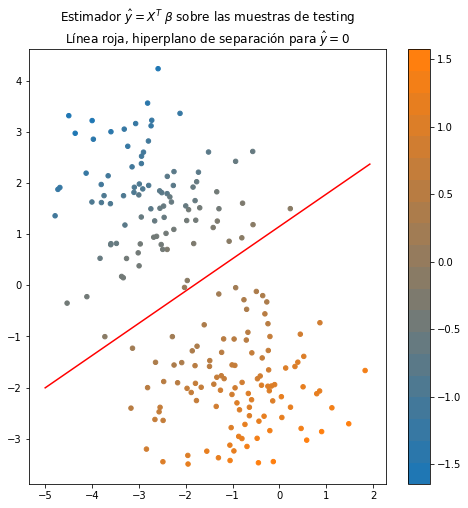

,delta,TP,FP,FN,TN,exactitud,precision,tpr,fpr
0,-1.0,0.535,0.345,0.000,0.120,0.655,0.607955,1.000000,0.741935
1,-0.9,0.535,0.330,0.000,0.135,0.670,0.618497,1.000000,0.709677
2,-0.8,0.535,0.280,0.000,0.185,0.720,0.656442,1.000000,0.602151
3,-0.7,0.535,0.250,0.000,0.215,0.750,0.681529,1.000000,0.537634
4,-0.6,0.535,0.185,0.000,0.280,0.815,0.743056,1.000000,0.397849
5,-0.5,0.535,0.145,0.000,0.320,0.855,0.786765,1.000000,0.311828
6,-0.4,0.535,0.080,0.000,0.385,0.920,0.869919,1.000000,0.172043
7,-0.3,0.535,0.040,0.000,0.425,0.960,0.930435,1.000000,0.086022
8,-0.2,0.535,0.030,0.000,0.435,0.970,0.946903,1.000000,0.064516
9,-0.1,0.535,0.020,0.000,0.445,0.980,0.963964,1.000000,0.043011


In [21]:
delta = 2*np.asarray(range(20))/20-1
out, estim = estadistico(beta, delta, X_test, Y_test)

ax = plt.figure(figsize=(8,8)).subplots(1,1)
sc = ax.scatter(test[:,0],test[:,1], s=20, c=y_est, cmap=cm)
plt.colorbar(sc)
ax.plot(rango,plano, 'red')
ax.set_title(r'Estimador $\hat{y} = X^T \; \beta$ sobre las muestras de testing'
             '\n'
             r'Línea roja, hiperplano de separación para $\hat{y}=0$')
print("Grafica de estimaciones")
plt.show()
out

Finalmente, se va a realizar la curva ROC, y calcular el área bajo la curva (AUC)

Área bajo la curva ROC (AUC): 0.7417344990453221


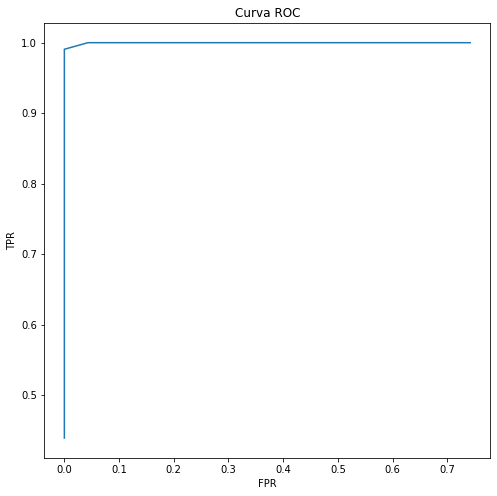

In [22]:
from sklearn.metrics import auc

ax = plt.figure(figsize=(8,8)).subplots(1,1)
ax.plot(out.fpr, out.tpr)
ax.set_title('Curva ROC')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')


print(f"Área bajo la curva ROC (AUC): {auc(out.fpr, out.tpr)}")